# Sampling and Hypothesis Testing

In [31]:
#Libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.stats import ttest_1samp
from prettytable import PrettyTable
import os
pd.options.mode.chained_assignment = None

# Visa Shopping

Visa shopping: It is where someone would apply in a specific consulate in order to have higher odds of getting the visa or getting a higher tier visa in general. The idea itself seemed to have a lot of rumours around it and the only way to consider it a myth/reality is by doing proper analysis over real data. Luckily, the data is here.

# Your job is to appropriately sample and run hypothesis testing to prove/disprove whether Visa-shopping is real. 

We are trying to figure out the best consulates to apply for to have the highest odds for receiving a uniform visa in general, or a multiple entry visa (MEV) in particular.

In [32]:
df = pd.read_csv("2018-data-for-consulates.csv")
df.head()

,Schengen State,Country where consulate is located,Consulate,Airport transit visas (ATVs) applied for,ATVs issued (including multiple),Multiple ATVs issued,ATVs not issued,Not issued rate for ATVs,Uniform visas applied for,Total uniform visas issued (including MEV),Multiple entry uniform visas (MEVs) issued,Share of MEVs on total number of uniform visas issued,Total LTVs issued,Uniform visas not issued,Not issued rate for uniform visas,Total ATVs and uniform visas applied for,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs)",Total ATVs and uniform visas not issued,Not issued rate for ATVs and uniform visas
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN,16,16,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%


# Data Cleaning: 


It is a good technique to strip column names of trailing white spaces and "\n" characters. Do that in the cell provided below.
- Rename columns with white spaces for e.g. "Schengen State': 'sch_state'"
- Look into df.strip()

In [33]:
# Replacing empty spaces with underscore in the column names
# Getting rid of trailing white spaces
# Stripping \n from the column names
df.columns = df.columns.str.strip('\n')
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.strip()
df.head()

,Schengen_State,Country_where_consulate_is_located,Consulate,Airport_transit_visas_(ATVs)_applied_for_,_ATVs_issued_(including_multiple),Multiple_ATVs_issued,ATVs_not_issued_,Not_issued_rate_for_ATVs,Uniform_visas_applied_for,Total__uniform_visas_issued_(including_MEV)_,Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas,Total_ATVs_and_uniform_visas_applied_for,"Total_ATVs_and_uniform_visas_issued__(including_multiple_ATVs,_MEVs_and_LTVs)_",Total_ATVs_and_uniform_visas_not_issued,Not_issued_rate_for_ATVs_and_uniform_visas_
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN,16,16,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%


We are not interested in Airport Transit Visas (ATV). Drop all the columns involving ATVs for e.g. Multiple ATVs issued, ATVs not issued,

In [34]:
#Removing all columns which have ATV mentioned in them
df = df[df.columns.drop(list(df.filter(regex='ATV')))]
df.head()

,Schengen_State,Country_where_consulate_is_located,Consulate,Uniform_visas_applied_for,Total__uniform_visas_issued_(including_MEV)_,Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas
0,Austria,ALBANIA,TIRANA,62,32,10,31.3%,21,9,14.5%
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1%,1,822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0%,NaN,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3%,1,122,4.4%
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4%,2,79,4.0%


In [35]:
# Renaming column names
df = df.rename(columns={'Schengen_State': 'sch_state','Consulate' :'consulate', 'Country_where_consulate_is_located': 'consulate_country', 'Uniform_visas_applied_for' : 'uv_applied', 'Total__uniform_visas_issued_(including_MEV)_' : 'total_uv+mev_issued', 'Multiple_entry_uniform_visas_(MEVs)_issued': 'mev_issued', 'Share_of_MEVs_on_total_number_of_uniform_visas_issued': 'shared_mev_issued', 'Total_LTVs_issued' : 'LTVs_issued', 'Uniform_visas_not_issued' : 'uv_unissued', 'Not_issued_rate_for_uniform_visas': 'unissued_uv_rate'})
df.head()

,sch_state,consulate_country,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate
0,Austria,ALBANIA,TIRANA,62,32,10,31.3%,21,9,14.5%
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1%,1,822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0%,NaN,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3%,1,122,4.4%
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4%,2,79,4.0%


# Missing Values

- Drop the rows where Schengen State is missing.
- Replace other missing values with zero.
- Print the summary for missing values after cleaning.

In [36]:
# Figuring out how many null values does each column have
df.isnull().sum()

sch_state               13
consulate_country       13
consulate               10
uv_applied              14
total_uv+mev_issued     54
mev_issued             147
shared_mev_issued      150
LTVs_issued            846
uv_unissued            361
unissued_uv_rate       363
dtype: int64

In [37]:
# Dropping all rows which have a missing value in the Schengen State
df = df[df['sch_state'].notnull()]
df.head()

,sch_state,consulate_country,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate
0,Austria,ALBANIA,TIRANA,62,32,10,31.3%,21,9,14.5%
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1%,1,822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0%,NaN,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3%,1,122,4.4%
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4%,2,79,4.0%


In [38]:
# Verifying if all the null values in Schengen State have been removed
df.isnull().sum() 

sch_state                0
consulate_country        0
consulate                0
uv_applied               4
total_uv+mev_issued     44
mev_issued             137
shared_mev_issued      139
LTVs_issued            836
uv_unissued            351
unissued_uv_rate       352
dtype: int64

In [39]:
# Replacing all the other null values (in all other columns) with zero
# df.astype('str')
for col in df.columns:
    df[col] = df[col].astype(str)
    if col != "sch_state" and col != "consulate_country" and col != "consulate":     
        df[col] = df[col].replace("nan", "0")

In [40]:
# Verifying if all the null values in all the remaining columns have been replaced
df.isnull().sum() 

sch_state              0
consulate_country      0
consulate              0
uv_applied             0
total_uv+mev_issued    0
mev_issued             0
shared_mev_issued      0
LTVs_issued            0
uv_unissued            0
unissued_uv_rate       0
dtype: int64

In [41]:
df.dtypes

sch_state              object
consulate_country      object
consulate              object
uv_applied             object
total_uv+mev_issued    object
mev_issued             object
shared_mev_issued      object
LTVs_issued            object
uv_unissued            object
unissued_uv_rate       object
dtype: object

In [42]:
for x in df.columns:
    df[x] = df[x].str.replace(',', '')
    df[x] = df[x].str.replace('%', '')
df.head()

,sch_state,consulate_country,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate
0,Austria,ALBANIA,TIRANA,62,32,10,31.3,21,9,14.5
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1,1,822,33.1
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0,0,0,0
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3,1,122,4.4
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4,2,79,4.0


In [43]:
for col in df.columns:
    if col != "sch_state" and col != "consulate_country" and col != "consulate" and col != 'shared_mev_issued' and col != 'unissued_uv_rate':
        df[col] = df[col].astype(int)
    if col == 'shared_mev_issued' or col == 'unissued_uv_rate':
        df[col] = df[col].astype(float)
df.dtypes

sch_state               object
consulate_country       object
consulate               object
uv_applied               int64
total_uv+mev_issued      int64
mev_issued               int64
shared_mev_issued      float64
LTVs_issued              int64
uv_unissued              int64
unissued_uv_rate       float64
dtype: object

- Add columns of "decisions" and "rejection_rate"
- Decisions is total number of decisions taken - sum of visas issued, LTV's issued, Rejected
- Rejection rate is what percentage of *decisions* are rejected

In [44]:
# Calculating the decisions value and adding another column to represent it
decisions = []
for index, row in df.iterrows():
    value = row['total_uv+mev_issued'] + row['LTVs_issued'] + row['uv_unissued'] 
    decisions.append(value)
df['decisions'] = decisions
df.head()

,sch_state,consulate_country,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions
0,Austria,ALBANIA,TIRANA,62,32,10,31.3,21,9,14.5,62
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1,1,822,33.1,2481
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0,0,0,0.0,16
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3,1,122,4.4,2776
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4,2,79,4.0,1976


In [45]:
# Calculating the rejection rate and adding another column to represent it 
rejection_rate = []
for index, row in df.iterrows():
    if(row['decisions'] == 0):
        rejection_rate.append(0)
    else:
        value = row['uv_unissued'] * 100.0 / row['decisions']
        rejection_rate.append(value)
df['rejection_rate'] = rejection_rate
df.head()

,sch_state,consulate_country,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate
0,Austria,ALBANIA,TIRANA,62,32,10,31.3,21,9,14.5,62,14.516129
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1,1,822,33.1,2481,33.131802
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0,0,0,0.0,16,0.000000
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3,1,122,4.4,2776,4.394813
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4,2,79,4.0,1976,3.997976


In [46]:
# There are some rows in which mev_issued are greater than total_uv+mev_issued which isn't possible 
# because if 10 people have issued the mev then the total_uv_mev_issued cannot be less than 10 because we know that 10 people have issued mev
# In this case, shared_mev_issued was greater than 100% too which can never happen. 
df = df[df['total_uv+mev_issued'] >= df['mev_issued']]
df.head()

,sch_state,consulate_country,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate
0,Austria,ALBANIA,TIRANA,62,32,10,31.3,21,9,14.5,62,14.516129
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1,1,822,33.1,2481,33.131802
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0,0,0,0.0,16,0.000000
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3,1,122,4.4,2776,4.394813
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4,2,79,4.0,1976,3.997976


# Hypothesis Testing

- We will be picking three countries.
- The three countries are Egypt, India and Japan.
- You need to test whether in there is a better _chance_ of getting a visa if you apply to a particukar consulate within that country or is it by chance.
- Add subheadings for each country

In order to answer this question correctly, we need to define the population and the sample we will use:
1. Population: Total number of applicants/rejects in all the country.
2. Sample: Total number of applicants/rejects in all the targeted consulates.
The null hypothesis, which is a prediction that there is no significant difference between a specific consulate over all other consulates and that these numbers could have happened out naturally due to fluctations in application qualities received.
In order to proceed with this, we need to make a rather **BIG** assumption, that all applications to all consulates have the same *average* quality or that they came from the same pool/population.




*Does this assumption make sense?*

_Write why or why not?_

*Write here*

No because there can be many other confounding factors* so we cannot assume that there will be equal likelyhood for every consulate and therefore making this assumption fals

* an outside influence that changes the effect of a dependent and independent variable

Yes because this assumption is necessary for us to be able to make any comparisons. We must assume that there is no difference (in an explicit sense) between the population and the sample we have. Without this assumption, we cannot test our hypothesis. 

#  We can conduct this using univariate T-test.
You will use the scipy package.
This links will help you get started:
    - https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
    
    
You need to calculate the test statistic and choose an appropriate p-value. Mention why you think this is an appropriate p-value. Once you have the test statistic, you need to sample and test your hypothesis.
    

For each country:
   - Plot a piechart showing the consulates with the highest number of decisions.
   - You will be running your hypothesis tests w.r.t three attributes
       - Rejection rate (if you have a weak visa application)
       - Multi-Entry Visa Share (if you have a strong visa application)
       - Weighted Score: You are required to calculate a normalized engineered feature
           - (1-rejection_rate) * mevs_share
           - Normalize this score
        

You are required to submit an analysis of *EACH* country why you think your hypothesis were rejected/accepted. You can include geo-political factors in your report as well.

#  Egypt

In [47]:
df1 = df[df['consulate_country'] == 'EGYPT'] 
df1.head()

,sch_state,consulate_country,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate
16,Austria,EGYPT,CAIRO,4993,4132,2872,69.5,39,822,16.5,4993,16.463048
85,Belgium,EGYPT,CAIRO,3250,1946,464,23.8,15,1111,34.2,3072,36.165365
170,Czech Republic,EGYPT,CAIRO,2713,2015,433,21.5,3,693,25.5,2711,25.562523
243,Denmark,EGYPT,CAIRO,1790,1542,763,49.5,1,238,13.3,1781,13.363279
295,Estonia,EGYPT,CAIRO,279,198,68,34.3,7,74,26.5,279,26.523297


# Egypt: Pie chart

In [48]:
# doing groupby so i can make piecharts using it
df1b = df1.groupby(['sch_state']).sum()
df1b

,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate
sch_state,,,,,,,,,
Austria,4993,4132,2872,69.5,39,822,16.5,4993,16.463048
Belgium,3250,1946,464,23.8,15,1111,34.2,3072,36.165365
Czech Republic,2713,2015,433,21.5,3,693,25.5,2711,25.562523
Denmark,1790,1542,763,49.5,1,238,13.3,1781,13.363279
Estonia,279,198,68,34.3,7,74,26.5,279,26.523297
Finland,985,846,291,34.4,0,131,13.3,977,13.408393
France,60165,45733,13514,29.5,341,11941,19.8,58015,20.582608
Germany,38535,32848,26496,80.7,315,5372,13.9,38535,13.940574
Greece,9816,8316,3135,84.4,106,1394,26.5,9816,26.499048


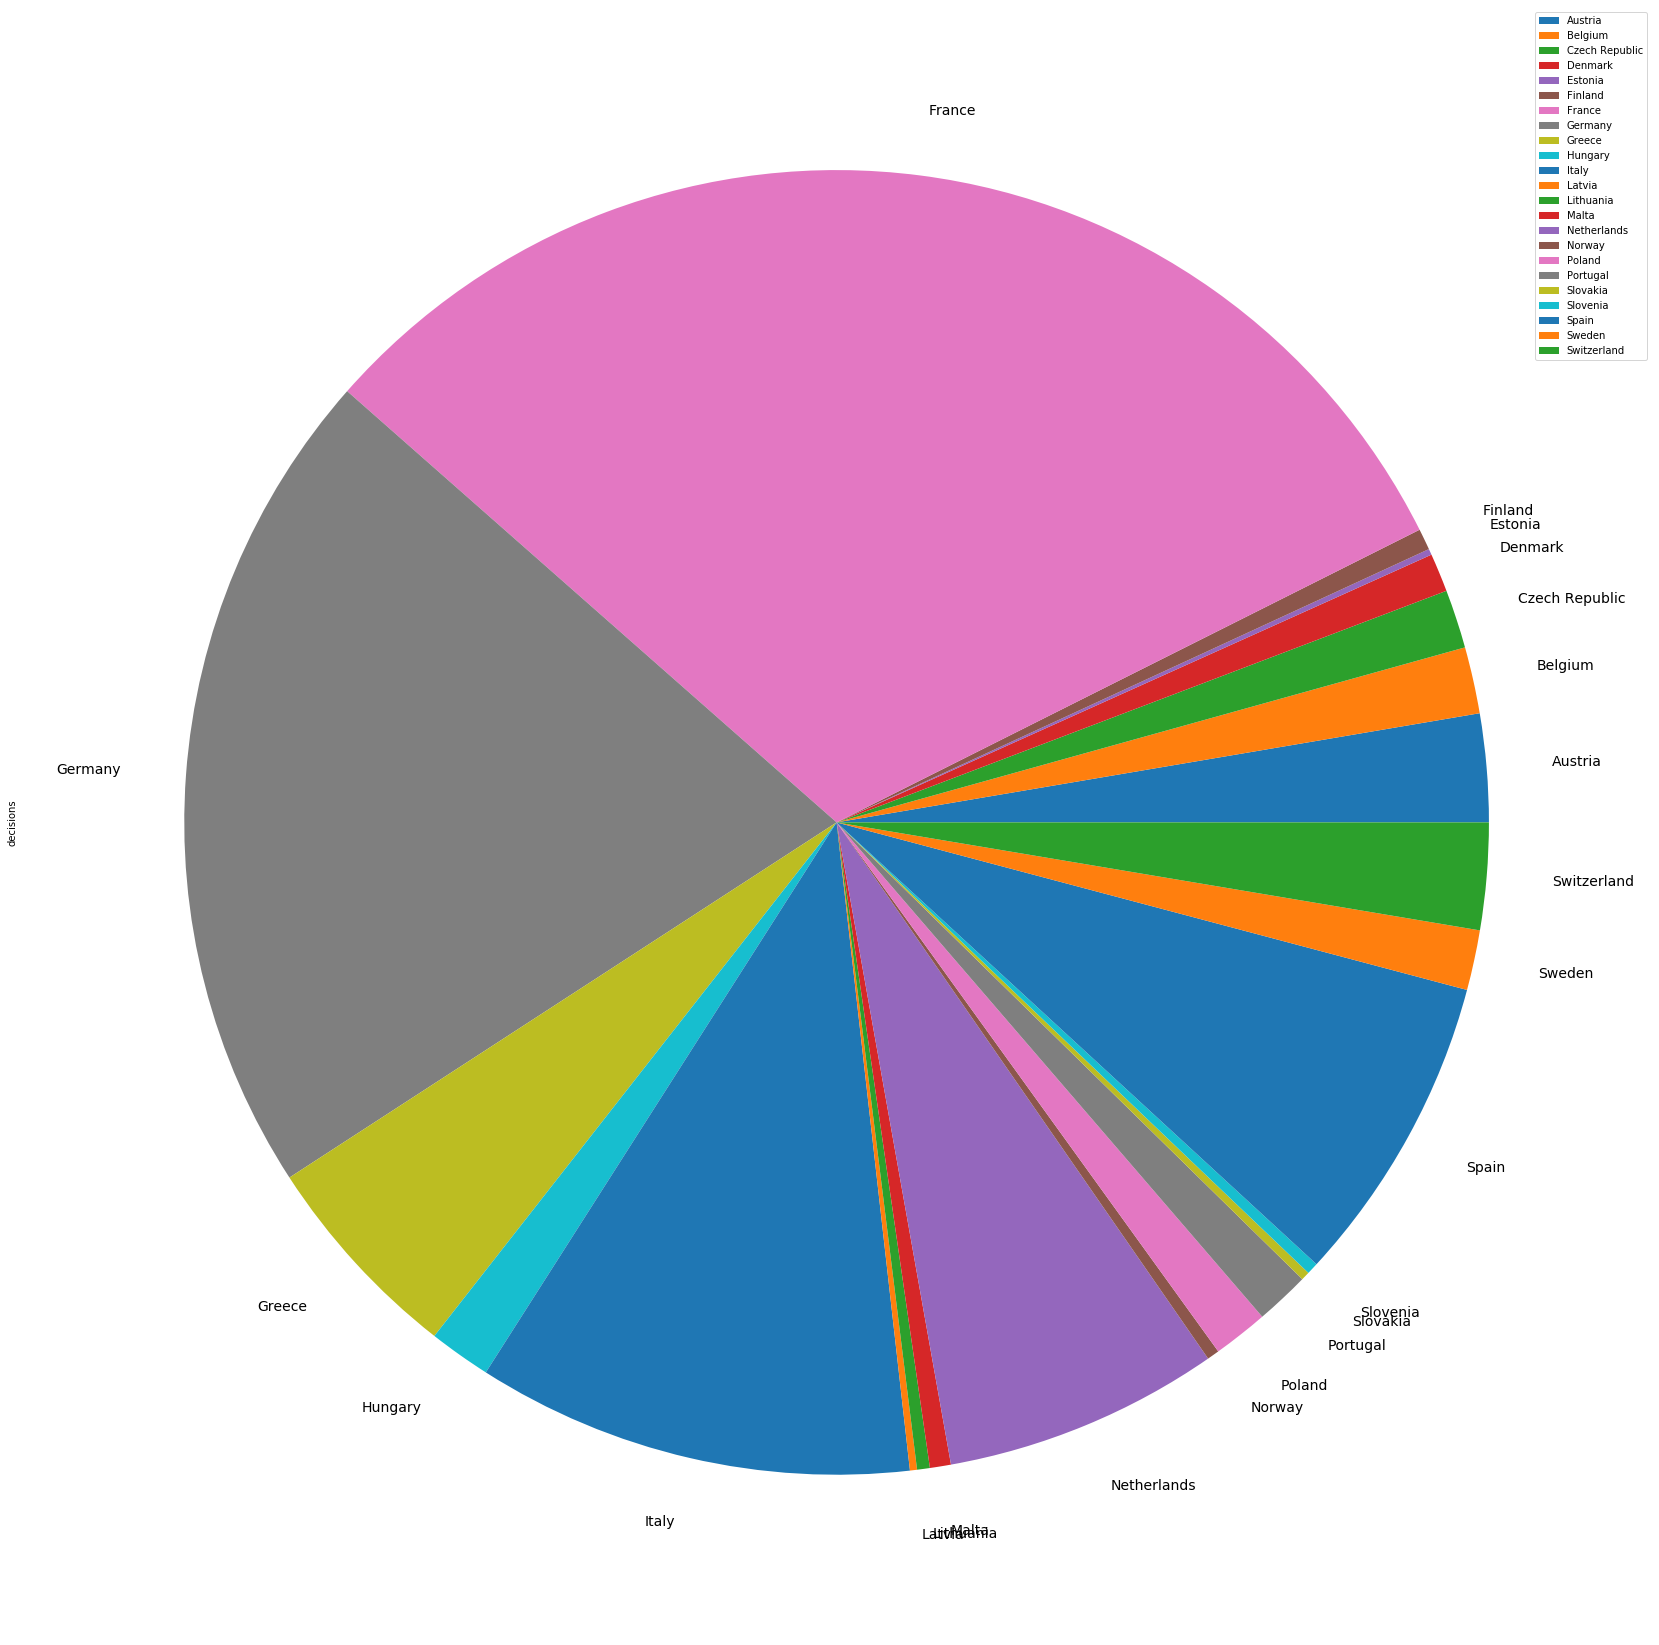

In [49]:
# making piechart
df1b.plot.pie(y='decisions', figsize=(50,30), fontsize = 14)

In [50]:
df1c = df1.groupby(['consulate']).sum()
df1c

,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate
consulate,,,,,,,,,
ALEXANDRIA,6983,5688,1936,67.6,2,1257,34.9,6947,35.117120
CAIRO,183157,141652,71082,950.0,1307,36634,482.5,179593,490.849046


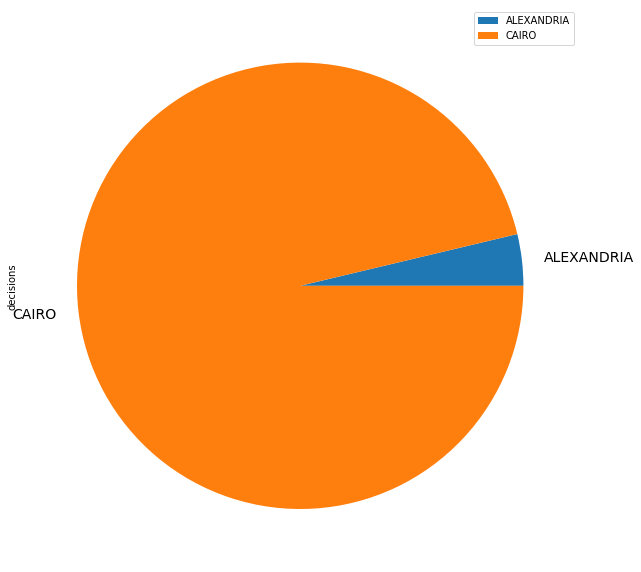

In [51]:
df1c.plot.pie(y='decisions', figsize=(10,30), fontsize = 14)

In [52]:
df1.reset_index(drop = True, inplace = True)
df1.head()

,sch_state,consulate_country,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate
0,Austria,EGYPT,CAIRO,4993,4132,2872,69.5,39,822,16.5,4993,16.463048
1,Belgium,EGYPT,CAIRO,3250,1946,464,23.8,15,1111,34.2,3072,36.165365
2,Czech Republic,EGYPT,CAIRO,2713,2015,433,21.5,3,693,25.5,2711,25.562523
3,Denmark,EGYPT,CAIRO,1790,1542,763,49.5,1,238,13.3,1781,13.363279
4,Estonia,EGYPT,CAIRO,279,198,68,34.3,7,74,26.5,279,26.523297


# Egypt: Hypothesis testing with respect to Rejection Rate 

In [53]:
# Adding the accepted column to my egypt dataframe
Accepted = []
for index, row in df1.iterrows():
    value = row['total_uv+mev_issued'] + row['LTVs_issued']
    Accepted.append(value)
df1['accepted'] = Accepted
df1.head()

,sch_state,consulate_country,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted
0,Austria,EGYPT,CAIRO,4993,4132,2872,69.5,39,822,16.5,4993,16.463048,4171
1,Belgium,EGYPT,CAIRO,3250,1946,464,23.8,15,1111,34.2,3072,36.165365,1961
2,Czech Republic,EGYPT,CAIRO,2713,2015,433,21.5,3,693,25.5,2711,25.562523,2018
3,Denmark,EGYPT,CAIRO,1790,1542,763,49.5,1,238,13.3,1781,13.363279,1543
4,Estonia,EGYPT,CAIRO,279,198,68,34.3,7,74,26.5,279,26.523297,205


In [54]:
# Dropping the consulate_country column because its of no use
df1 = df1.drop(['consulate_country'], axis = 1)
df1.head()

,sch_state,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted
0,Austria,CAIRO,4993,4132,2872,69.5,39,822,16.5,4993,16.463048,4171
1,Belgium,CAIRO,3250,1946,464,23.8,15,1111,34.2,3072,36.165365,1961
2,Czech Republic,CAIRO,2713,2015,433,21.5,3,693,25.5,2711,25.562523,2018
3,Denmark,CAIRO,1790,1542,763,49.5,1,238,13.3,1781,13.363279,1543
4,Estonia,CAIRO,279,198,68,34.3,7,74,26.5,279,26.523297,205


In [55]:
statisticalValue = (df1['rejection_rate']/100).mean()
print('Statistical value is ',statisticalValue)

Statistical value is  0.21038646648362344


In [56]:
# Making lists of 0s and 1s based on what the accepted and rejected (uv_unissued) values are
# 0 -> accepted
# 1 -> rejected
FinalList = [] 
for index, row in df1.iterrows():
    numberOfAccepted = row['accepted']
    numberOfRejected = row['uv_unissued']
    arrSize = numberOfAccepted + numberOfRejected
    arr = []
    for i in range(numberOfAccepted):
        arr.append(0)
    for i in range(numberOfRejected):
        arr.append(1)
    FinalList.append(arr)

In [57]:
# Running t test
table = PrettyTable()

table.field_names = ["sch_stat","consulate", "Status", "P-Value", "Statistical Value"]
lengthOfFinalList = len(FinalList)
for i in range(lengthOfFinalList):
    test = FinalList[i]
    tset, pvalue = ttest_1samp(test, statisticalValue)
    if pvalue < 0.05/2:
        table.add_row([df1.loc[i, 'sch_state'],df1.loc[i, 'consulate'], 'x', pvalue, tset])
    else:
        table.add_row([df1.loc[i, 'sch_state'],df1.loc[i, 'consulate'], 'o', pvalue, tset])
key = PrettyTable()
key.field_names = ['symbol', 'meaning']
key.add_row(['x', 'Null hypothesis rejected'])
key.add_row(['o', 'Null hypothesis accepted'])
print(key)
print(table)

+--------+--------------------------+
| symbol |         meaning          |
+--------+--------------------------+
|   x    | Null hypothesis rejected |
|   o    | Null hypothesis accepted |
+--------+--------------------------+
+----------------+------------+--------+-------------------------+---------------------+
|    sch_stat    | consulate  | Status |         P-Value         |  Statistical Value  |
+----------------+------------+--------+-------------------------+---------------------+
|    Austria     |   CAIRO    |   x    |  3.816348168889037e-18  |  -8.717475757821015 |
|    Belgium     |   CAIRO    |   x    |  4.5441980106899625e-65 |  17.446567780851073 |
| Czech Republic |   CAIRO    |   x    |  7.289839564754892e-08  |  5.398805679346684  |
|    Denmark     |   CAIRO    |   x    |  5.5673285376172306e-21 |  -9.517034925943985 |
|    Estonia     |   CAIRO    |   o    |   0.03923537315400779   |  2.071489785280612  |
|    Finland     |   CAIRO    |   x    |   4.89304745246234e

# Egypt: Hypothesis testing with respect to Multi-Entry Visa Share

In [58]:
statisticalValue = (df1['shared_mev_issued']/100.0).mean()
print('Statistical value is ',statisticalValue)

Statistical value is  0.40704


In [59]:
# Adding the non MEV column to my egypt dataframe
nonMEV = []
for index, row in df1.iterrows():
    value = row['total_uv+mev_issued'] - row['mev_issued']
    nonMEV.append(value)
df1['nonMEV'] = nonMEV
df1.head()

,sch_state,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted,nonMEV
0,Austria,CAIRO,4993,4132,2872,69.5,39,822,16.5,4993,16.463048,4171,1260
1,Belgium,CAIRO,3250,1946,464,23.8,15,1111,34.2,3072,36.165365,1961,1482
2,Czech Republic,CAIRO,2713,2015,433,21.5,3,693,25.5,2711,25.562523,2018,1582
3,Denmark,CAIRO,1790,1542,763,49.5,1,238,13.3,1781,13.363279,1543,779
4,Estonia,CAIRO,279,198,68,34.3,7,74,26.5,279,26.523297,205,130


In [60]:
# Making lists of 0s and 1s based on what the MEV issued and nonMEV values are
# 1 -> MEV
# 0 -> nonMEV
FinalList = [] 
for index, row in df1.iterrows():
    numberOfAccepted = row['mev_issued']
    numberOfRejected = row['nonMEV']
    arrSize = numberOfAccepted + numberOfRejected
    arr = []
    for i in range(numberOfAccepted):
        arr.append(1)
    for i in range(numberOfRejected):
        arr.append(0)
    FinalList.append(arr)

In [61]:
# Running t test
table = PrettyTable()

table.field_names = ["sch_stat","consulate", "Status", "P-Value", "Statistical Value"]
lengthOfFinalList = len(FinalList)
for i in range(lengthOfFinalList):
    test = FinalList[i]
    tset, pvalue = ttest_1samp(test, statisticalValue)
    if pvalue < 0.05/2:
        table.add_row([df1.loc[i, 'sch_state'],df1.loc[i, 'consulate'], 'x', pvalue, tset])
    else:
        table.add_row([df1.loc[i, 'sch_state'],df1.loc[i, 'consulate'], 'o', pvalue, tset])
key = PrettyTable()
key.field_names = ['symbol', 'meaning']
key.add_row(['x', 'Null hypothesis rejected'])
key.add_row(['o', 'Null hypothesis accepted'])
print(key)
print(table)

+--------+--------------------------+
| symbol |         meaning          |
+--------+--------------------------+
|   x    | Null hypothesis rejected |
|   o    | Null hypothesis accepted |
+--------+--------------------------+
+----------------+------------+--------+-------------------------+---------------------+
|    sch_stat    | consulate  | Status |         P-Value         |  Statistical Value  |
+----------------+------------+--------+-------------------------+---------------------+
|    Austria     |   CAIRO    |   x    | 1.1736821064454438e-298 |  40.210314906918576 |
|    Belgium     |   CAIRO    |   x    |  1.8358134332445813e-63 | -17.449489641160984 |
| Czech Republic |   CAIRO    |   x    |  1.1757768765002833e-88 | -20.994316602169377 |
|    Denmark     |   CAIRO    |   x    |  8.024425638496697e-12  |  6.891445976603601  |
|    Estonia     |   CAIRO    |   o    |   0.06157810959035467   | -1.8800435554542534 |
|    Finland     |   CAIRO    |   x    |  0.0001223364260502

# Egypt: Hypothesis testing with respect to Weighted Score

In [62]:
weightedScore = []
for index, row in df1.iterrows():
    value = (1- (row['rejection_rate']/100.0))*(row['shared_mev_issued']/100.0)
    weightedScore.append(value)
df1['weighted_score'] = weightedScore

df1

,sch_state,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted,nonMEV,weighted_score
0,Austria,CAIRO,4993,4132,2872,69.5,39,822,16.5,4993,16.463048,4171,1260,0.580582
1,Belgium,CAIRO,3250,1946,464,23.8,15,1111,34.2,3072,36.165365,1961,1482,0.151926
2,Czech Republic,CAIRO,2713,2015,433,21.5,3,693,25.5,2711,25.562523,2018,1582,0.160041
3,Denmark,CAIRO,1790,1542,763,49.5,1,238,13.3,1781,13.363279,1543,779,0.428852
4,Estonia,CAIRO,279,198,68,34.3,7,74,26.5,279,26.523297,205,130,0.252025
5,Finland,CAIRO,985,846,291,34.4,0,131,13.3,977,13.408393,846,555,0.297875
6,France,CAIRO,60165,45733,13514,29.5,341,11941,19.8,58015,20.582608,46074,32219,0.234281
7,Germany,CAIRO,38535,32848,26496,80.7,315,5372,13.9,38535,13.940574,33163,6352,0.694500
8,Greece,ALEXANDRIA,3210,2873,1633,56.8,0,337,10.5,3210,10.498442,2873,1240,0.508369
9,Greece,CAIRO,6606,5443,1502,27.6,106,1057,16.0,6606,16.000606,5549,3941,0.231838


In [63]:
x = (df1.loc[:,['weighted_score']]).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1['weighted_score'] = pd.DataFrame(x_scaled)

In [64]:
df1

,sch_state,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted,nonMEV,weighted_score
0,Austria,CAIRO,4993,4132,2872,69.5,39,822,16.5,4993,16.463048,4171,1260,0.748712
1,Belgium,CAIRO,3250,1946,464,23.8,15,1111,34.2,3072,36.165365,1961,1482,0.169858
2,Czech Republic,CAIRO,2713,2015,433,21.5,3,693,25.5,2711,25.562523,2018,1582,0.180815
3,Denmark,CAIRO,1790,1542,763,49.5,1,238,13.3,1781,13.363279,1543,779,0.543817
4,Estonia,CAIRO,279,198,68,34.3,7,74,26.5,279,26.523297,205,130,0.305031
5,Finland,CAIRO,985,846,291,34.4,0,131,13.3,977,13.408393,846,555,0.366946
6,France,CAIRO,60165,45733,13514,29.5,341,11941,19.8,58015,20.582608,46074,32219,0.281070
7,Germany,CAIRO,38535,32848,26496,80.7,315,5372,13.9,38535,13.940574,33163,6352,0.902546
8,Greece,ALEXANDRIA,3210,2873,1633,56.8,0,337,10.5,3210,10.498442,2873,1240,0.651196
9,Greece,CAIRO,6606,5443,1502,27.6,106,1057,16.0,6606,16.000606,5549,3941,0.277771


In [65]:
statisticalValue = df1['weighted_score'].mean()
statisticalValue

0.40139554433997526

In [66]:
accepted3 = []
rejected3 = []
for index, row in df1.iterrows():
    value = row['weighted_score']
    accepted3.append(value*row['decisions'])
    rejected3.append((1-value)*row['decisions'])

df1['accepted3'] = accepted3
df1['rejected3'] = rejected3
df1['accepted3'] = df1['accepted3'].astype(int)
df1['rejected3'] = df1['rejected3'].astype(int)
df1.head()

,sch_state,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted,nonMEV,weighted_score,accepted3,rejected3
0,Austria,CAIRO,4993,4132,2872,69.5,39,822,16.5,4993,16.463048,4171,1260,0.748712,3738,1254
1,Belgium,CAIRO,3250,1946,464,23.8,15,1111,34.2,3072,36.165365,1961,1482,0.169858,521,2550
2,Czech Republic,CAIRO,2713,2015,433,21.5,3,693,25.5,2711,25.562523,2018,1582,0.180815,490,2220
3,Denmark,CAIRO,1790,1542,763,49.5,1,238,13.3,1781,13.363279,1543,779,0.543817,968,812
4,Estonia,CAIRO,279,198,68,34.3,7,74,26.5,279,26.523297,205,130,0.305031,85,193


In [67]:
FinalList = [] 
for index, row in df1.iterrows():
    numberOfAccepted = row['accepted3']
    numberOfRejected = row['rejected3']
    arr = []
    for i in range(numberOfAccepted):
        arr.append(1)
    for i in range(numberOfRejected):
        arr.append(0)
    FinalList.append(arr)

In [68]:
# Running t test
table = PrettyTable()

table.field_names = ["sch_state","consulate", "Status", "P-Value", "Statistical Value"]
lengthOfFinalList = len(FinalList)
for i in range(lengthOfFinalList):
    test = FinalList[i]
    tset, pvalue = ttest_1samp(test, statisticalValue)
    if pvalue < 0.05/2:
        table.add_row([df1.loc[i, 'sch_state'],df1.loc[i, 'consulate'], 'x', pvalue, tset])
    else:
        table.add_row([df1.loc[i, 'sch_state'],df1.loc[i, 'consulate'], 'o', pvalue, tset])
key = PrettyTable()
key.field_names = ['symbol', 'meaning']
key.add_row(['x', 'Null hypothesis rejected'])
key.add_row(['o', 'Null hypothesis accepted'])
print(key)
print(table)

+--------+--------------------------+
| symbol |         meaning          |
+--------+--------------------------+
|   x    | Null hypothesis rejected |
|   o    | Null hypothesis accepted |
+--------+--------------------------+
+----------------+------------+--------+-------------------------+---------------------+
|   sch_state    | consulate  | Status |         P-Value         |  Statistical Value  |
+----------------+------------+--------+-------------------------+---------------------+
|    Austria     |   CAIRO    |   x    |           0.0           |  56.58911799120288  |
|    Belgium     |   CAIRO    |   x    | 1.3313838231405732e-217 |  -34.21121400226589 |
| Czech Republic |   CAIRO    |   x    | 2.4820581005449234e-169 | -29.831339496352843 |
|    Denmark     |   CAIRO    |   x    |  2.9690155173825744e-32 |  12.060839457652204 |
|    Estonia     |   CAIRO    |   x    |  0.0006367384354967014  | -3.4549105332701697 |
|    Finland     |   CAIRO    |   o    |   0.025232548918042

# Egypt: Final Analysis

For the schegian states which have rejected the null hypothesis, a factor may be that the Egyptian foreign affairs are becoming more strict when it comes to visas, mainly due to visa shopping.
Reference link:https://www.schengenvisainfo.com/news/egypt-urges-nationals-to-comply-with-schengen-travel-rules/

# India

In [69]:
df2 = df[df['consulate_country'] == 'INDIA'] 
df2.head()

,sch_state,consulate_country,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate
93,Belgium,INDIA,MUMBAI,19162,18360,15892,86.6,0,551,2.9,18911,2.913648
94,Belgium,INDIA,NEW DELHI,7117,6052,4029,66.6,0,888,12.5,6940,12.795389
177,Czech Republic,INDIA,NEW DELHI,26683,20449,2035,10.0,0,6219,23.3,26668,23.320084
253,Denmark,INDIA,NEW DELHI,23275,21890,18884,86.3,1,949,4.1,22840,4.154991
298,Estonia,INDIA,NEW DELHI,2425,1524,984,64.6,3,898,37.0,2425,37.030928


# India: Pie Chart

In [70]:
# doing groupby so i can make piecharts using it
df2b = df2.groupby(['sch_state']).sum()
df2b

,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate
sch_state,,,,,,,,,
Belgium,26279,24412,19921,153.2,0,1439,15.4,25851,15.709037
Czech Republic,26683,20449,2035,10.0,0,6219,23.3,26668,23.320084
Denmark,23275,21890,18884,86.3,1,949,4.1,22840,4.154991
Estonia,2425,1524,984,64.6,3,898,37.0,2425,37.030928
Finland,11959,11398,7869,69.0,2,512,4.3,11912,4.298187
France,229153,203570,26138,60.8,16,23714,43.0,227300,43.366433
Germany,167001,152928,131134,439.8,234,13839,39.1,167001,39.098214
Greece,45341,40112,40107,100.0,12,5217,11.5,45341,11.506142
Hungary,21704,19707,13600,128.3,2,1995,19.2,21704,19.196802


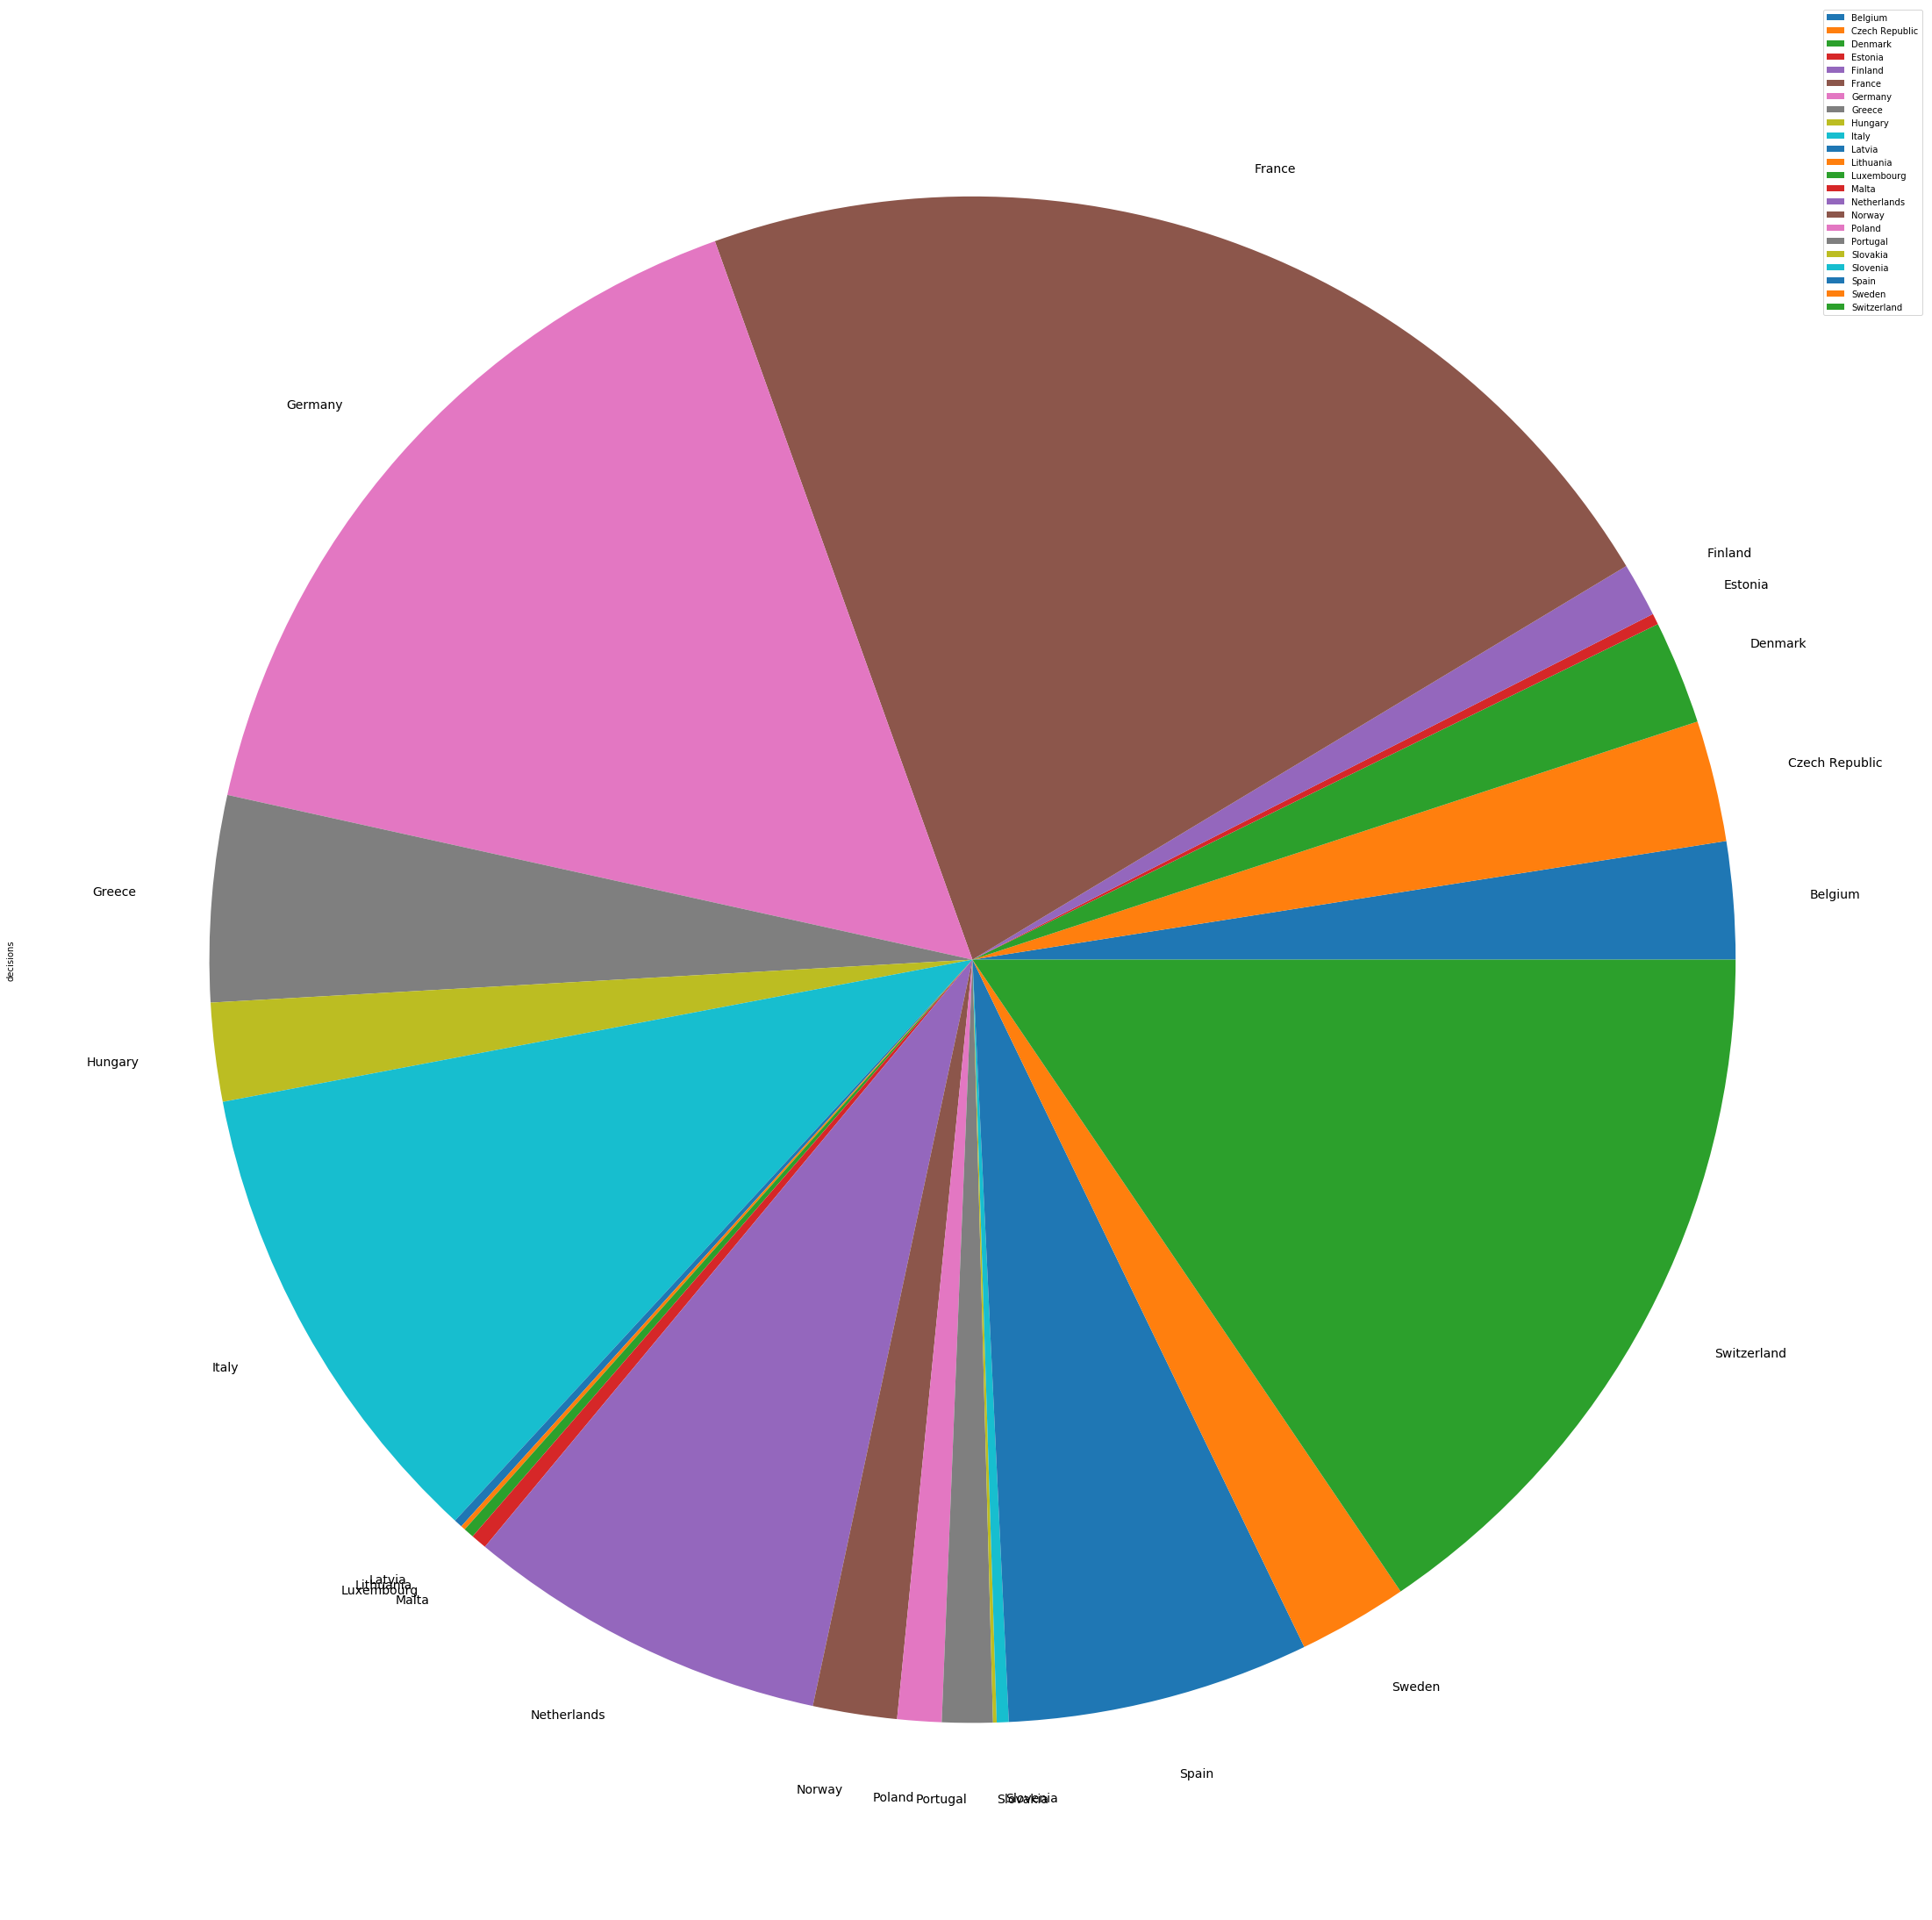

In [71]:
# making piechart
df2b.plot.pie(y='decisions', figsize=(52,40), fontsize = 14)

In [72]:
df2c = df2.groupby(['consulate']).sum()
df2c

,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate
consulate,,,,,,,,,
BANGALORE,93942,87623,43093,183.7,70,5812,19.3,93505,19.444986
CHENNAI,30269,27945,23365,171.4,9,2276,14.8,30230,14.903294
GOA,3193,2842,71,2.5,18,333,10.4,3193,10.429064
KOLKATA,39032,36567,20367,302.2,0,2354,28.2,38921,28.208601
MUMBAI,286281,264351,155646,536.0,58,21020,53.3,285429,53.501136
NEW DELHI,567352,498235,312585,1251.3,1003,65282,379.0,564520,381.198421
PONDICHERY,24470,22319,1895,8.5,0,1901,7.8,24220,7.848885


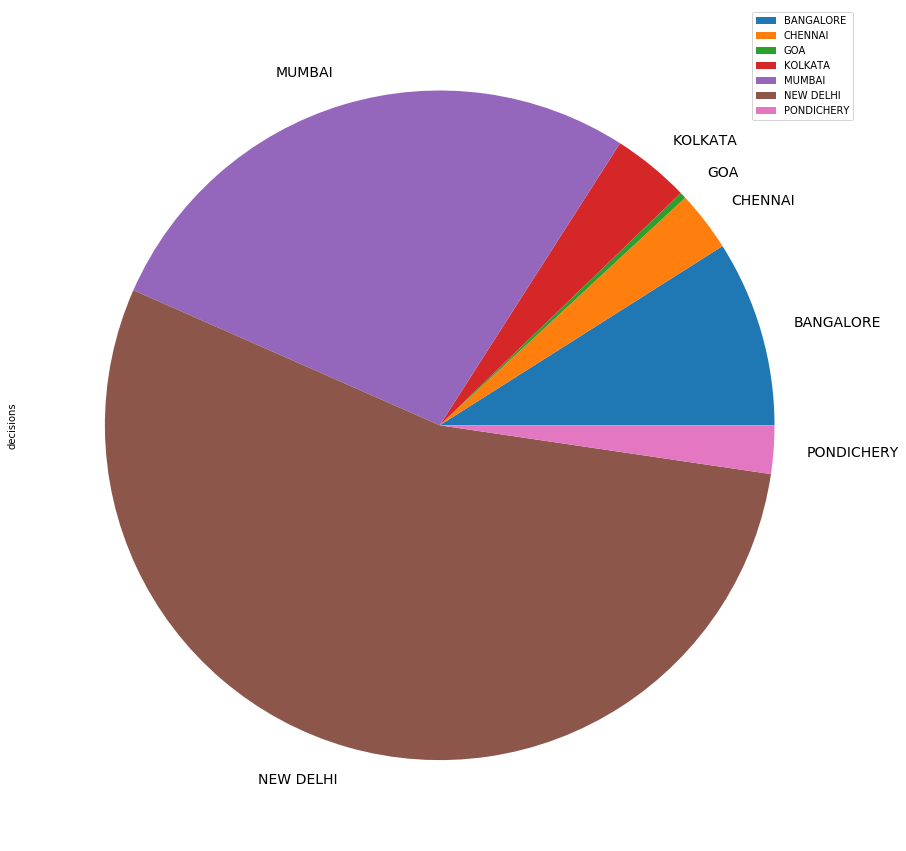

In [73]:
df2c.plot.pie(y='decisions', figsize=(15,30), fontsize = 14)

In [74]:
df2.reset_index(drop = True, inplace = True)
df2.head()

,sch_state,consulate_country,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate
0,Belgium,INDIA,MUMBAI,19162,18360,15892,86.6,0,551,2.9,18911,2.913648
1,Belgium,INDIA,NEW DELHI,7117,6052,4029,66.6,0,888,12.5,6940,12.795389
2,Czech Republic,INDIA,NEW DELHI,26683,20449,2035,10.0,0,6219,23.3,26668,23.320084
3,Denmark,INDIA,NEW DELHI,23275,21890,18884,86.3,1,949,4.1,22840,4.154991
4,Estonia,INDIA,NEW DELHI,2425,1524,984,64.6,3,898,37.0,2425,37.030928


# India: Hypothesis testing with respect to Rejection Rate

In [75]:
# Adding the accepted column to my india dataframe
Accepted = []
for index, row in df2.iterrows():
    value = row['total_uv+mev_issued'] + row['LTVs_issued']
    Accepted.append(value)
df2['accepted'] = Accepted
df2.head()

,sch_state,consulate_country,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted
0,Belgium,INDIA,MUMBAI,19162,18360,15892,86.6,0,551,2.9,18911,2.913648,18360
1,Belgium,INDIA,NEW DELHI,7117,6052,4029,66.6,0,888,12.5,6940,12.795389,6052
2,Czech Republic,INDIA,NEW DELHI,26683,20449,2035,10.0,0,6219,23.3,26668,23.320084,20449
3,Denmark,INDIA,NEW DELHI,23275,21890,18884,86.3,1,949,4.1,22840,4.154991,21891
4,Estonia,INDIA,NEW DELHI,2425,1524,984,64.6,3,898,37.0,2425,37.030928,1527


In [76]:
# Dropping the consulate_country column because its of no use
df2 = df2.drop(['consulate_country'], axis = 1)
df2.head()

,sch_state,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted
0,Belgium,MUMBAI,19162,18360,15892,86.6,0,551,2.9,18911,2.913648,18360
1,Belgium,NEW DELHI,7117,6052,4029,66.6,0,888,12.5,6940,12.795389,6052
2,Czech Republic,NEW DELHI,26683,20449,2035,10.0,0,6219,23.3,26668,23.320084,20449
3,Denmark,NEW DELHI,23275,21890,18884,86.3,1,949,4.1,22840,4.154991,21891
4,Estonia,NEW DELHI,2425,1524,984,64.6,3,898,37.0,2425,37.030928,1527


In [77]:
statisticalValue = (df2['rejection_rate']/100.0).mean()
print('Statistical value is ',statisticalValue)

Statistical value is  0.12274628258348788


In [78]:
# Making lists of 0s and 1s based on what the accepted and rejected (uv_unissued) values are
# 0 -> accepted
# 1 -> rejected
FinalList = [] 
for index, row in df2.iterrows():
    numberOfAccepted = row['accepted']
    numberOfRejected = row['uv_unissued']
    arrSize = numberOfAccepted + numberOfRejected
    arr = []
    for i in range(numberOfAccepted):
        arr.append(0)
    for i in range(numberOfRejected):
        arr.append(1)
    FinalList.append(arr)

In [79]:
# Running t test
table = PrettyTable()
table.field_names = ["sch_stat","consulate", "Status", "P-Value", "Statistical Value"]
lengthOfFinalList = len(FinalList)
for i in range(lengthOfFinalList):
    test = FinalList[i]
    tset, pvalue = ttest_1samp(test, statisticalValue)
    if pvalue < 0.05/2:
        table.add_row([df2.loc[i, 'sch_state'],df2.loc[i, 'consulate'], 'x', pvalue, tset])
    else:
        table.add_row([df2.loc[i, 'sch_state'],df2.loc[i, 'consulate'], 'o', pvalue, tset])
key = PrettyTable()
key.field_names = ['symbol', 'meaning']
key.add_row(['x', 'Null hypothesis rejected'])
key.add_row(['o', 'Null hypothesis accepted'])
print(key)
print(table)

+--------+--------------------------+
| symbol |         meaning          |
+--------+--------------------------+
|   x    | Null hypothesis rejected |
|   o    | Null hypothesis accepted |
+--------+--------------------------+
+----------------+------------+--------+-------------------------+---------------------+
|    sch_stat    | consulate  | Status |         P-Value         |  Statistical Value  |
+----------------+------------+--------+-------------------------+---------------------+
|    Belgium     |   MUMBAI   |   x    |           0.0           |  -76.53664906583515 |
|    Belgium     | NEW DELHI  |   o    |   0.19410914541554872   |  1.2986444066634664 |
| Czech Republic | NEW DELHI  |   x    |           0.0           |  42.65449952891543  |
|    Denmark     | NEW DELHI  |   x    |           0.0           | -61.490121311261355 |
|    Estonia     | NEW DELHI  |   x    |  5.231267128283246e-125 |  25.240973059225805 |
|    Finland     | NEW DELHI  |   x    |           0.0      

# India: Hypothesis testing with respect to Multi-Entry Visa Share

In [80]:
statisticalValue = (df2['shared_mev_issued']/100.0).mean()
print('Statistical value is ',statisticalValue)

Statistical value is  0.5846666666666667


In [81]:
# Adding the non MEV column to my india dataframe
nonMEV = []
for index, row in df2.iterrows():
    value = row['total_uv+mev_issued'] - row['mev_issued']
    nonMEV.append(value)
df2['nonMEV'] = nonMEV
df2.head()

,sch_state,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted,nonMEV
0,Belgium,MUMBAI,19162,18360,15892,86.6,0,551,2.9,18911,2.913648,18360,2468
1,Belgium,NEW DELHI,7117,6052,4029,66.6,0,888,12.5,6940,12.795389,6052,2023
2,Czech Republic,NEW DELHI,26683,20449,2035,10.0,0,6219,23.3,26668,23.320084,20449,18414
3,Denmark,NEW DELHI,23275,21890,18884,86.3,1,949,4.1,22840,4.154991,21891,3006
4,Estonia,NEW DELHI,2425,1524,984,64.6,3,898,37.0,2425,37.030928,1527,540


In [82]:
# Making lists of 0s and 1s based on what the MEV issued and nonMEV values are
# 1 -> MEV
# 0 -> nonMEV
FinalList = [] 
for index, row in df2.iterrows():
    numberOfAccepted = row['mev_issued']
    numberOfRejected = row['nonMEV']
    arrSize = numberOfAccepted + numberOfRejected
    arr = []
    for i in range(numberOfAccepted):
        arr.append(1)
    for i in range(numberOfRejected):
        arr.append(0)
    FinalList.append(arr)

In [83]:
# Running t test
table = PrettyTable()

table.field_names = ["sch_stat","consulate", "Status", "P-Value", "Statistical Value"]
lengthOfFinalList = len(FinalList)
for i in range(lengthOfFinalList):
    test = FinalList[i]
    tset, pvalue = ttest_1samp(test, statisticalValue)
    if pvalue < 0.05/2:
        table.add_row([df2.loc[i, 'sch_state'],df2.loc[i, 'consulate'], 'x', pvalue, tset])
    else:
        table.add_row([df2.loc[i, 'sch_state'],df2.loc[i, 'consulate'], 'o', pvalue, tset])
key = PrettyTable()
key.field_names = ['symbol', 'meaning']
key.add_row(['x', 'Null hypothesis rejected'])
key.add_row(['o', 'Null hypothesis accepted'])
print(key)
print(table)

+--------+--------------------------+
| symbol |         meaning          |
+--------+--------------------------+
|   x    | Null hypothesis rejected |
|   o    | Null hypothesis accepted |
+--------+--------------------------+
+----------------+------------+--------+-------------------------+---------------------+
|    sch_stat    | consulate  | Status |         P-Value         |  Statistical Value  |
+----------------+------------+--------+-------------------------+---------------------+
|    Belgium     |   MUMBAI   |   x    |           0.0           |  111.58442396897368 |
|    Belgium     | NEW DELHI  |   x    |  3.4756011108705764e-40 |  13.367253513317014 |
| Czech Republic | NEW DELHI  |   x    |           0.0           | -231.74905237046917 |
|    Denmark     | NEW DELHI  |   x    |           0.0           |  119.50283552065063 |
|    Estonia     | NEW DELHI  |   x    |   7.1822789685586e-07   |  4.977244905215333  |
|    Finland     | NEW DELHI  |   x    |  2.492194513643449e

# India: Hypothesis testing with respect to Weighted Score

In [84]:
weightedScore = []
for index, row in df2.iterrows():
    value = (1- (row['rejection_rate']/100.0))*(row['shared_mev_issued']/100.0)
    weightedScore.append(value)
df2['weighted_score'] = weightedScore

df2.head()

,sch_state,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted,nonMEV,weighted_score
0,Belgium,MUMBAI,19162,18360,15892,86.6,0,551,2.9,18911,2.913648,18360,2468,0.840768
1,Belgium,NEW DELHI,7117,6052,4029,66.6,0,888,12.5,6940,12.795389,6052,2023,0.580783
2,Czech Republic,NEW DELHI,26683,20449,2035,10.0,0,6219,23.3,26668,23.320084,20449,18414,0.076680
3,Denmark,NEW DELHI,23275,21890,18884,86.3,1,949,4.1,22840,4.154991,21891,3006,0.827142
4,Estonia,NEW DELHI,2425,1524,984,64.6,3,898,37.0,2425,37.030928,1527,540,0.406780


In [85]:
x = (df2.loc[:,['weighted_score']]).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2['weighted_score'] = pd.DataFrame(x_scaled)


In [86]:
statisticalValue = df2['weighted_score'].mean()
statisticalValue

0.5471946416083433

In [87]:
accepted3 = []
rejected3 = []
for index, row in df2.iterrows():
    value = row['weighted_score']
    accepted3.append(value*row['decisions'])
    rejected3.append((1-value)*row['decisions'])

df2['accepted3'] = accepted3
df2['rejected3'] = rejected3
df2['accepted3'] = df2['accepted3'].astype(int)
df2['rejected3'] = df2['rejected3'].astype(int)
df2.head()

,sch_state,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted,nonMEV,weighted_score,accepted3,rejected3
0,Belgium,MUMBAI,19162,18360,15892,86.6,0,551,2.9,18911,2.913648,18360,2468,0.890970,16849,2061
1,Belgium,NEW DELHI,7117,6052,4029,66.6,0,888,12.5,6940,12.795389,6052,2023,0.611996,4247,2692
2,Czech Republic,NEW DELHI,26683,20449,2035,10.0,0,6219,23.3,26668,23.320084,20449,18414,0.071074,1895,24772
3,Denmark,NEW DELHI,23275,21890,18884,86.3,1,949,4.1,22840,4.154991,21891,3006,0.876349,20015,2824
4,Estonia,NEW DELHI,2425,1524,984,64.6,3,898,37.0,2425,37.030928,1527,540,0.425284,1031,1393


In [88]:
FinalList = [] 
for index, row in df2.iterrows():
    numberOfAccepted = row['accepted3']
    numberOfRejected = row['rejected3']
    arrSize = numberOfAccepted + numberOfRejected
    arr = []
    for i in range(numberOfAccepted):
        arr.append(1)
    for i in range(numberOfRejected):
        arr.append(0)
    FinalList.append(arr)

In [89]:
# Running t test
table = PrettyTable()

table.field_names = ["sch_state","consulate", "Status", "P-Value", "Statistical Value"]
lengthOfFinalList = len(FinalList)
for i in range(lengthOfFinalList):
    test = FinalList[i]
    tset, pvalue = ttest_1samp(test, statisticalValue)
    if pvalue < 0.05/2:
        table.add_row([df2.loc[i, 'sch_state'],df2.loc[i, 'consulate'], 'x', pvalue, tset])
    else:
        table.add_row([df2.loc[i, 'sch_state'],df2.loc[i, 'consulate'], 'o', pvalue, tset])
key = PrettyTable()
key.field_names = ['symbol', 'meaning']
key.add_row(['x', 'Null hypothesis rejected'])
key.add_row(['o', 'Null hypothesis accepted'])
print(key)
print(table)

+--------+--------------------------+
| symbol |         meaning          |
+--------+--------------------------+
|   x    | Null hypothesis rejected |
|   o    | Null hypothesis accepted |
+--------+--------------------------+
+----------------+------------+--------+-------------------------+---------------------+
|   sch_state    | consulate  | Status |         P-Value         |  Statistical Value  |
+----------------+------------+--------+-------------------------+---------------------+
|    Belgium     |   MUMBAI   |   x    |           0.0           |  151.7137984071493  |
|    Belgium     | NEW DELHI  |   x    |  2.5399720577616606e-28 |  11.085794229200127 |
| Czech Republic | NEW DELHI  |   x    |           0.0           | -302.61905134075016 |
|    Denmark     | NEW DELHI  |   x    |           0.0           |  151.11213843134163 |
|    Estonia     | NEW DELHI  |   x    |  6.210947547888344e-33  | -12.133386437378583 |
|    Finland     | NEW DELHI  |   x    | 3.9427668126213454e

# India: Final Analysis

In my opinion, null hypothesis was rejected in India due to the fact that every year millions of indians apply for visa as you can see in the link: https://qz.com/india/1603047/schengen-countries-list-that-indians-are-crazy-about/

This leads to a longer processing and waiting time which mostly people don't want to go through it and, therefore, tend to do it the illegal way or a substitute way. This is where visa shopping comes into play. 

# Japan

In [90]:
df3 = df[df['consulate_country'] == 'JAPAN'] 
df3.head()

,sch_state,consulate_country,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate
25,Austria,JAPAN,TOKYO,543,543,38,7.0,0,0,0.0,543,0.000000
102,Belgium,JAPAN,TOKYO,338,311,183,58.8,0,15,4.4,326,4.601227
184,Czech Republic,JAPAN,TOKYO,345,345,31,9.0,0,0,0.0,345,0.000000
259,Denmark,JAPAN,TOKYO,321,321,27,8.4,0,2,0.6,323,0.619195
301,Estonia,JAPAN,TOKYO,46,45,16,35.6,0,1,2.2,46,2.173913


# Japan: Pie Chart

In [91]:
# doing groupby so i can make piecharts using it
df3b = df3.groupby(['sch_state']).sum()
df3b

,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate
sch_state,,,,,,,,,
Austria,543,543,38,7.0,0,0,0.0,543,0.000000
Belgium,338,311,183,58.8,0,15,4.4,326,4.601227
Czech Republic,345,345,31,9.0,0,0,0.0,345,0.000000
Denmark,321,321,27,8.4,0,2,0.6,323,0.619195
Estonia,46,45,16,35.6,0,1,2.2,46,2.173913
Finland,401,373,61,16.4,14,12,3.0,399,3.007519
France,2753,2592,682,26.3,2,107,3.9,2701,3.961496
Germany,2644,2625,2317,162.3,4,15,1.8,2644,1.811594
Greece,408,398,171,43.0,0,10,2.5,408,2.450980


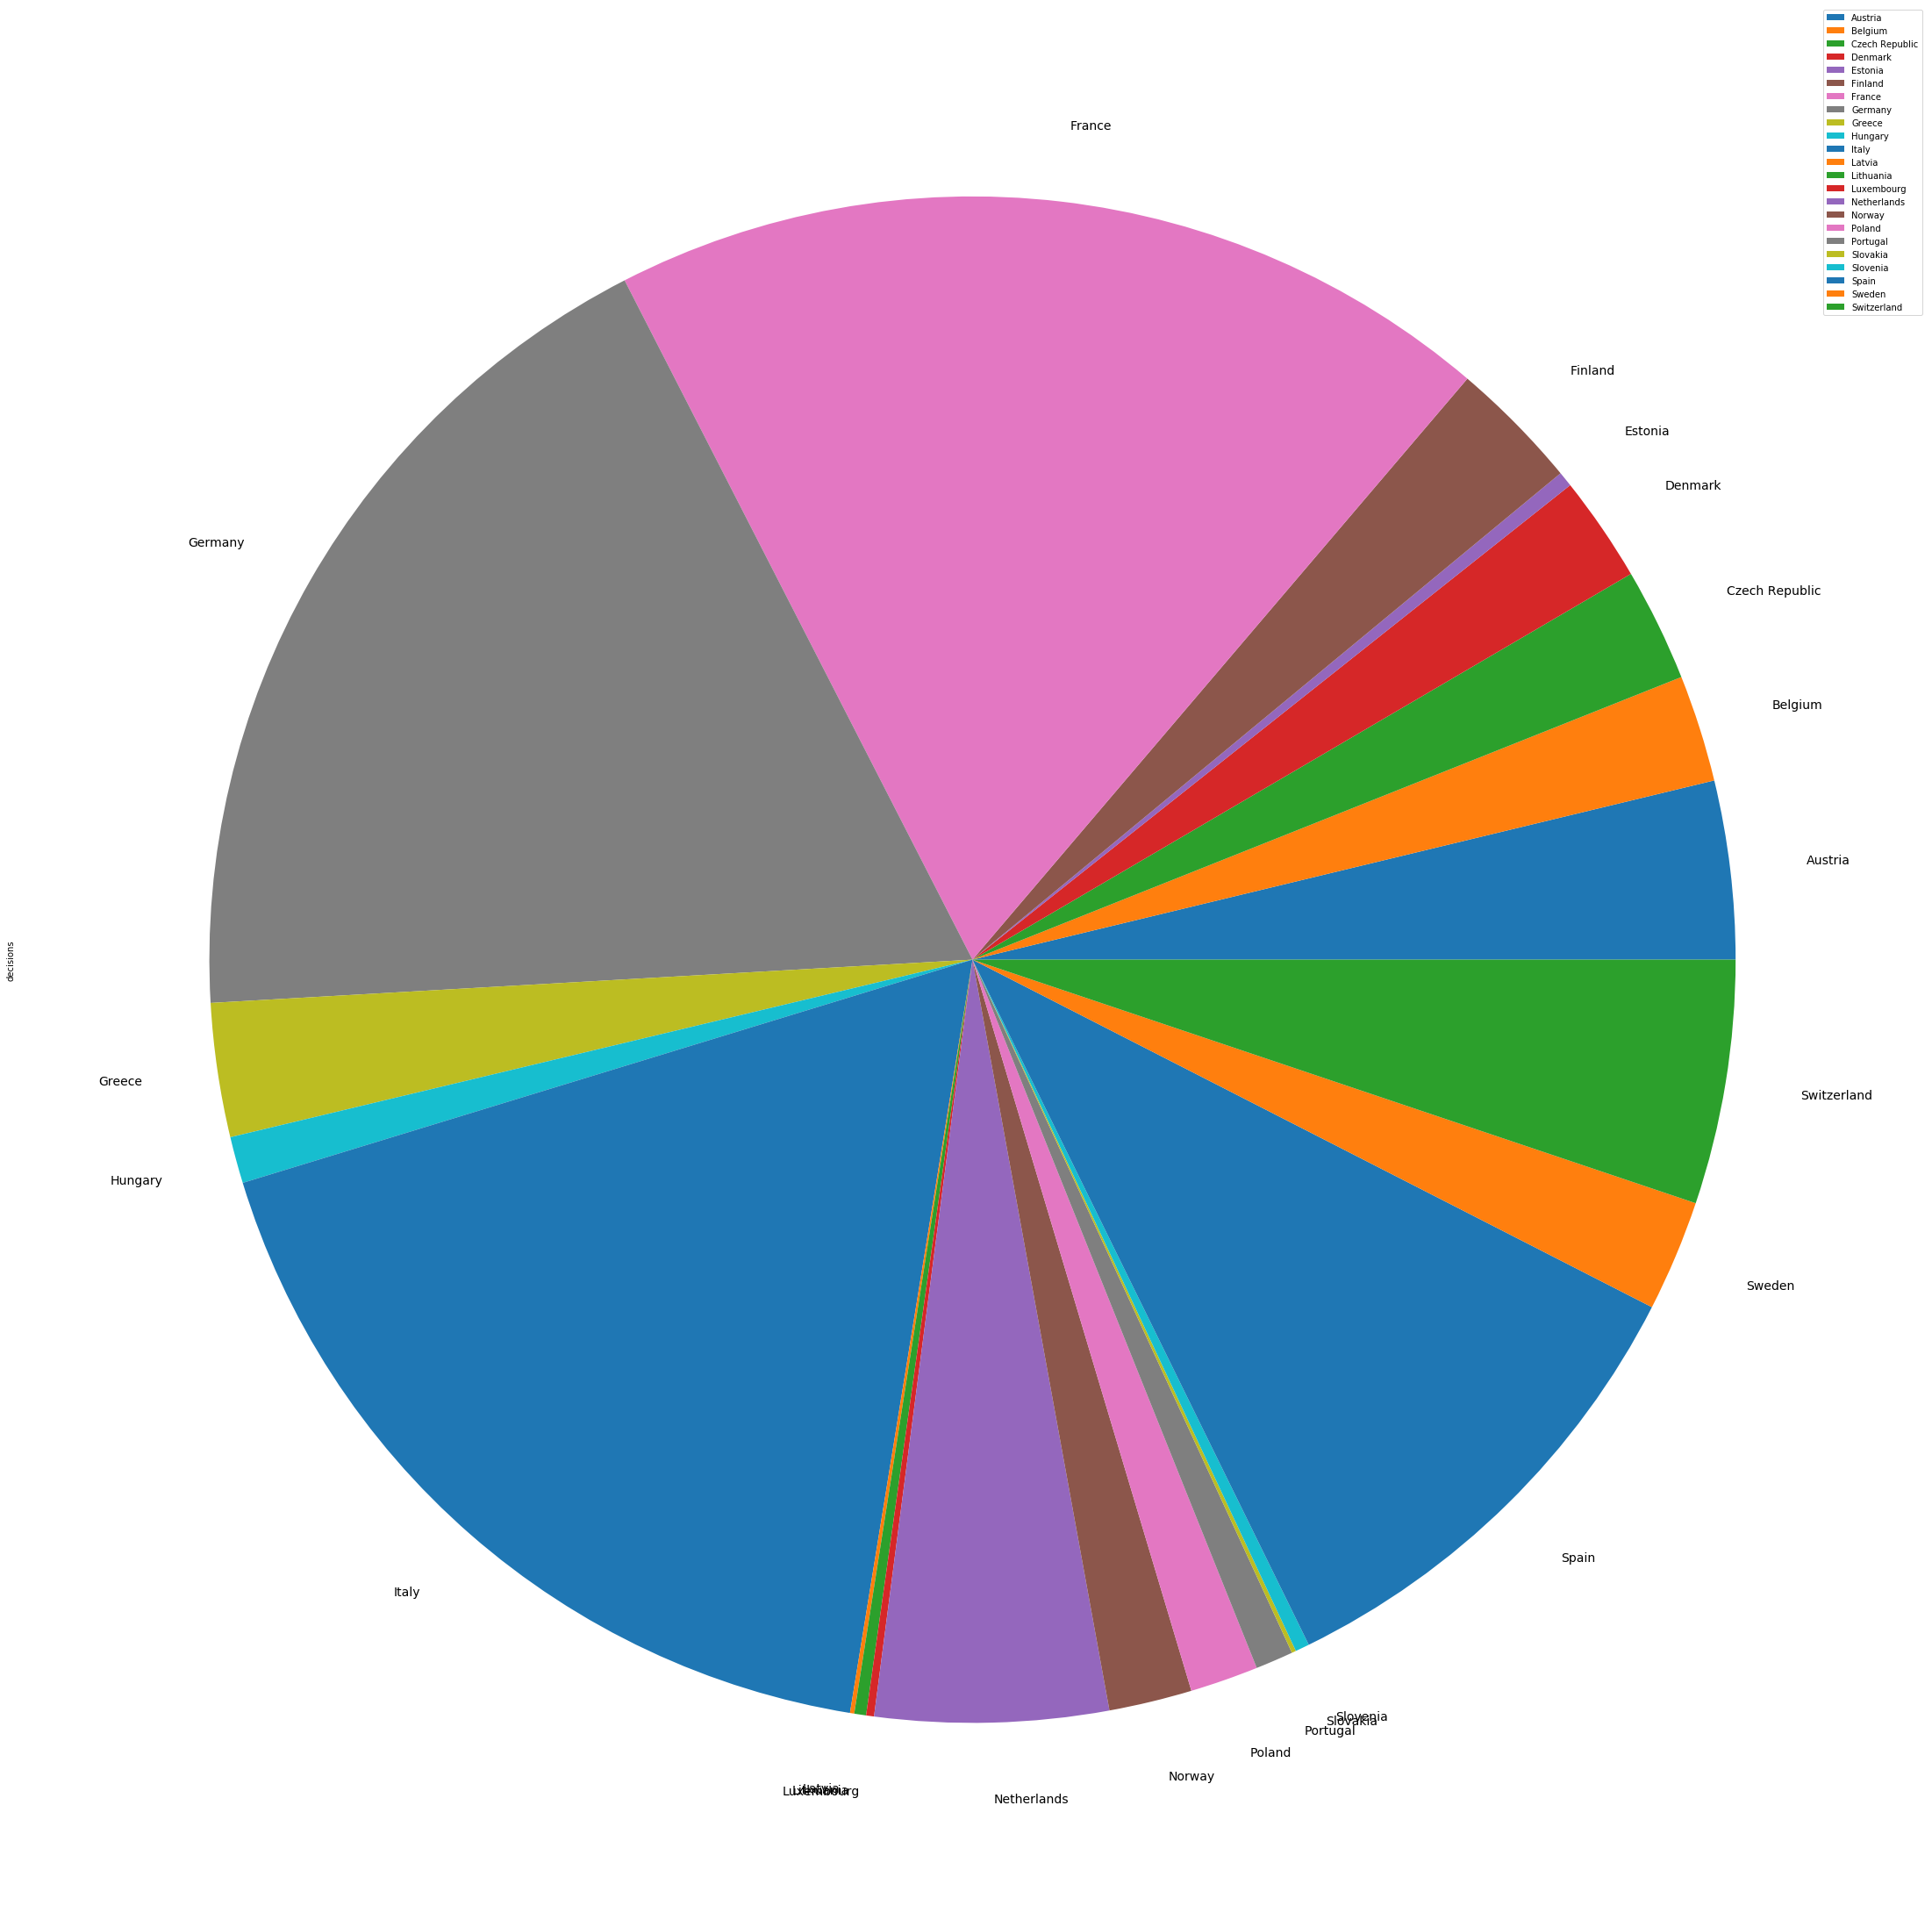

In [92]:
# making piechart
df3b.plot.pie(y='decisions', figsize=(50,40), fontsize = 14)

In [93]:
df3c = df3.groupby(['consulate']).sum()
df3c

,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate
consulate,,,,,,,,,
OSAKA,1404,1387,1083,162.5,2,15,1.8,1404,1.811594
TOKYO,13142,12637,6603,804.2,31,322,55.9,12990,56.681980


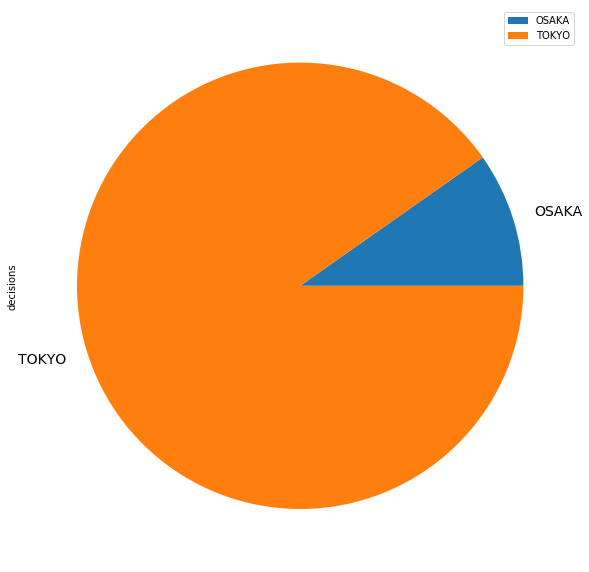

In [94]:
df3c.plot.pie(y='decisions', figsize=(10,30), fontsize = 14)

# Japan: Hypothesis testing with respect to Rejection Rate

In [95]:
# Adding the accepted column to my japan dataframe
Accepted = []
for index, row in df3.iterrows():
    value = row['total_uv+mev_issued'] + row['LTVs_issued']
    Accepted.append(value)
df3['accepted'] = Accepted
df3.head()

,sch_state,consulate_country,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted
25,Austria,JAPAN,TOKYO,543,543,38,7.0,0,0,0.0,543,0.000000,543
102,Belgium,JAPAN,TOKYO,338,311,183,58.8,0,15,4.4,326,4.601227,311
184,Czech Republic,JAPAN,TOKYO,345,345,31,9.0,0,0,0.0,345,0.000000,345
259,Denmark,JAPAN,TOKYO,321,321,27,8.4,0,2,0.6,323,0.619195,321
301,Estonia,JAPAN,TOKYO,46,45,16,35.6,0,1,2.2,46,2.173913,45


In [96]:
# Dropping the consulate_country column because its of no use
df3 = df3.drop(['consulate_country'], axis = 1)
df3.head()

,sch_state,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted
25,Austria,TOKYO,543,543,38,7.0,0,0,0.0,543,0.000000,543
102,Belgium,TOKYO,338,311,183,58.8,0,15,4.4,326,4.601227,311
184,Czech Republic,TOKYO,345,345,31,9.0,0,0,0.0,345,0.000000,345
259,Denmark,TOKYO,321,321,27,8.4,0,2,0.6,323,0.619195,321
301,Estonia,TOKYO,46,45,16,35.6,0,1,2.2,46,2.173913,45


In [97]:
df3.reset_index(drop = True, inplace = True)
df3.head()

,sch_state,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted
0,Austria,TOKYO,543,543,38,7.0,0,0,0.0,543,0.000000,543
1,Belgium,TOKYO,338,311,183,58.8,0,15,4.4,326,4.601227,311
2,Czech Republic,TOKYO,345,345,31,9.0,0,0,0.0,345,0.000000,345
3,Denmark,TOKYO,321,321,27,8.4,0,2,0.6,323,0.619195,321
4,Estonia,TOKYO,46,45,16,35.6,0,1,2.2,46,2.173913,45


In [98]:
statisticalValue = (df3['rejection_rate']/100.0).mean()
print('Statistical value is ',statisticalValue)

Statistical value is  0.023397429487175173


In [99]:
# Making lists of 0s and 1s based on what the accepted and rejected (uv_unissued) values are
# 0 -> accepted
# 1 -> rejected
FinalList = [] 
for index, row in df3.iterrows():
    numberOfAccepted = row['accepted']
    numberOfRejected = row['uv_unissued']
    arrSize = numberOfAccepted + numberOfRejected
    arr = []
    for i in range(numberOfAccepted):
        arr.append(0)
    for i in range(numberOfRejected):
        arr.append(1)
    FinalList.append(arr)

In [100]:
# Running t test
table = PrettyTable()
table.field_names = ["sch_stat","consulate", "Status", "P-Value", "Statistical Value"]
lengthOfFinalList = len(FinalList)
for i in range(lengthOfFinalList):
    test = FinalList[i]
    tset, pvalue = ttest_1samp(test, statisticalValue)
    if pvalue < 0.05/2:
        table.add_row([df3.loc[i, 'sch_state'],df3.loc[i, 'consulate'], 'x', pvalue, tset])
    else:
        table.add_row([df3.loc[i, 'sch_state'],df3.loc[i, 'consulate'], 'o', pvalue, tset])
key = PrettyTable()
key.field_names = ['symbol', 'meaning']
key.add_row(['x', 'Null hypothesis rejected'])
key.add_row(['o', 'Null hypothesis accepted'])
print(key)
print(table)

+--------+--------------------------+
| symbol |         meaning          |
+--------+--------------------------+
|   x    | Null hypothesis rejected |
|   o    | Null hypothesis accepted |
+--------+--------------------------+
+----------------+-----------+--------+------------------------+----------------------+
|    sch_stat    | consulate | Status |        P-Value         |  Statistical Value   |
+----------------+-----------+--------+------------------------+----------------------+
|    Austria     |   TOKYO   |   x    |          0.0           |         -inf         |
|    Belgium     |   TOKYO   |   o    |  0.052524983628885746  |  1.9459289743649717  |
| Czech Republic |   TOKYO   |   x    |          0.0           |         -inf         |
|    Denmark     |   TOKYO   |   x    | 0.00010164802421537957 |  -3.935770014067519  |
|    Estonia     |   TOKYO   |   o    |   0.9395330812903011   | -0.07628175641005797 |
|    Finland     |   TOKYO   |   o    |  0.43584980107970983   |  0.

# Japan: Hypothesis testing with respect to Multi-Entry Visa Share

In [101]:
MEVrate = []
for index, row in df3.iterrows():
    value = row['mev_issued']*100/row['total_uv+mev_issued']
    MEVrate.append(value)
df3['MEV_rate'] = MEVrate
df3.head()

,sch_state,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted,MEV_rate
0,Austria,TOKYO,543,543,38,7.0,0,0,0.0,543,0.000000,543,6.998158
1,Belgium,TOKYO,338,311,183,58.8,0,15,4.4,326,4.601227,311,58.842444
2,Czech Republic,TOKYO,345,345,31,9.0,0,0,0.0,345,0.000000,345,8.985507
3,Denmark,TOKYO,321,321,27,8.4,0,2,0.6,323,0.619195,321,8.411215
4,Estonia,TOKYO,46,45,16,35.6,0,1,2.2,46,2.173913,45,35.555556


In [102]:
# using ratio of sum of mev_issued with respect to sum of total_uv+mev_issued as my statistical value
statisticalValue = (df3['shared_mev_issued']/100.0).mean()
print('Statistical value is ',statisticalValue)

Statistical value is  0.38667999999999997


In [103]:
# Adding the non MEV column to my india dataframe
nonMEV = []
for index, row in df3.iterrows():
    value = row['total_uv+mev_issued'] - row['mev_issued']
    nonMEV.append(value)
df3['nonMEV'] = nonMEV
df3.head()

,sch_state,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted,MEV_rate,nonMEV
0,Austria,TOKYO,543,543,38,7.0,0,0,0.0,543,0.000000,543,6.998158,505
1,Belgium,TOKYO,338,311,183,58.8,0,15,4.4,326,4.601227,311,58.842444,128
2,Czech Republic,TOKYO,345,345,31,9.0,0,0,0.0,345,0.000000,345,8.985507,314
3,Denmark,TOKYO,321,321,27,8.4,0,2,0.6,323,0.619195,321,8.411215,294
4,Estonia,TOKYO,46,45,16,35.6,0,1,2.2,46,2.173913,45,35.555556,29


In [104]:
# Making lists of 0s and 1s based on what the MEV issued and nonMEV values are
# 1 -> MEV
# 0 -> nonMEV
FinalList = [] 
for index, row in df3.iterrows():
    numberOfAccepted = row['mev_issued']
    numberOfRejected = row['nonMEV']
    arrSize = numberOfAccepted + numberOfRejected
    arr = []
    for i in range(numberOfAccepted):
        arr.append(1)
    for i in range(numberOfRejected):
        arr.append(0)
    FinalList.append(arr)

In [105]:
# Running t test
table = PrettyTable()

table.field_names = ["sch_stat","consulate", "Status", "P-Value", "Statistical Value"]
lengthOfFinalList = len(FinalList)
for i in range(lengthOfFinalList):
    test = FinalList[i]
    tset, pvalue = ttest_1samp(test, statisticalValue)
    if pvalue < 0.05/2:
        table.add_row([df3.loc[i, 'sch_state'],df3.loc[i, 'consulate'], 'x', pvalue, tset])
    else:
        table.add_row([df3.loc[i, 'sch_state'],df3.loc[i, 'consulate'], 'o', pvalue, tset])
key = PrettyTable()
key.field_names = ['symbol', 'meaning']
key.add_row(['x', 'Null hypothesis rejected'])
key.add_row(['o', 'Null hypothesis accepted'])
print(key)
print(table)

+--------+--------------------------+
| symbol |         meaning          |
+--------+--------------------------+
|   x    | Null hypothesis rejected |
|   o    | Null hypothesis accepted |
+--------+--------------------------+
+----------------+-----------+--------+------------------------+---------------------+
|    sch_stat    | consulate | Status |        P-Value         |  Statistical Value  |
+----------------+-----------+--------+------------------------+---------------------+
|    Austria     |   TOKYO   |   x    | 7.660989983783721e-112 |  -28.90066773229981 |
|    Belgium     |   TOKYO   |   x    | 4.091872491225351e-12  |  7.217923503015383  |
| Czech Republic |   TOKYO   |   x    | 1.4585640512677431e-56 | -19.250987670218983 |
|    Denmark     |   TOKYO   |   x    | 2.300303034295738e-56  | -19.500567676440536 |
|    Estonia     |   TOKYO   |   o    |   0.6683546839972678   | -0.4313019979646226 |
|    Finland     |   TOKYO   |   x    | 6.684544237144408e-27  | -11.6363749

# Japan: Hypothesis testing with respect to Weighted Score

In [106]:
weightedScore = []
for index, row in df3.iterrows():
    value = (1- (row['rejection_rate']/100.0))*(row['shared_mev_issued']/100.0)
    weightedScore.append(value)
df3['weighted_score'] = weightedScore

df3.head()

,sch_state,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted,MEV_rate,nonMEV,weighted_score
0,Austria,TOKYO,543,543,38,7.0,0,0,0.0,543,0.000000,543,6.998158,505,0.070000
1,Belgium,TOKYO,338,311,183,58.8,0,15,4.4,326,4.601227,311,58.842444,128,0.560945
2,Czech Republic,TOKYO,345,345,31,9.0,0,0,0.0,345,0.000000,345,8.985507,314,0.090000
3,Denmark,TOKYO,321,321,27,8.4,0,2,0.6,323,0.619195,321,8.411215,294,0.083480
4,Estonia,TOKYO,46,45,16,35.6,0,1,2.2,46,2.173913,45,35.555556,29,0.348261


In [107]:
x = (df3.loc[:,['weighted_score']]).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df3['weighted_score'] = pd.DataFrame(x_scaled)

In [108]:
statisticalValue = df3['weighted_score'].mean()
statisticalValue

0.3775252026005149

In [109]:
accepted3 = []
rejected3 = []
for index, row in df3.iterrows():
    value = row['weighted_score']
    accepted3.append(value*row['decisions'])
    rejected3.append((1-value)*row['decisions'])

df3['accepted3'] = accepted3
df3['rejected3'] = rejected3
df3['accepted3'] = df3['accepted3'].astype(int)
df3['rejected3'] = df3['rejected3'].astype(int)
df3.head()

,sch_state,consulate,uv_applied,total_uv+mev_issued,mev_issued,shared_mev_issued,LTVs_issued,uv_unissued,unissued_uv_rate,decisions,rejection_rate,accepted,MEV_rate,nonMEV,weighted_score,accepted3,rejected3
0,Austria,TOKYO,543,543,38,7.0,0,0,0.0,543,0.000000,543,6.998158,505,0.070000,38,504
1,Belgium,TOKYO,338,311,183,58.8,0,15,4.4,326,4.601227,311,58.842444,128,0.560945,182,143
2,Czech Republic,TOKYO,345,345,31,9.0,0,0,0.0,345,0.000000,345,8.985507,314,0.090000,31,313
3,Denmark,TOKYO,321,321,27,8.4,0,2,0.6,323,0.619195,321,8.411215,294,0.083480,26,296
4,Estonia,TOKYO,46,45,16,35.6,0,1,2.2,46,2.173913,45,35.555556,29,0.348261,16,29


In [110]:
FinalList = [] 
for index, row in df3.iterrows():
    numberOfAccepted = row['accepted3']
    numberOfRejected = row['rejected3']
    arrSize = numberOfAccepted + numberOfRejected
    arr = []
    for i in range(numberOfAccepted):
        arr.append(1)
    for i in range(numberOfRejected):
        arr.append(0)
    FinalList.append(arr)

In [111]:
# Running t test
table = PrettyTable()

table.field_names = ["sch_state","consulate", "Status", "P-Value", "Statistical Value"]
lengthOfFinalList = len(FinalList)
for i in range(lengthOfFinalList):
    test = FinalList[i]
    tset, pvalue = ttest_1samp(test, statisticalValue)
    if pvalue < 0.05/2:
        table.add_row([df3.loc[i, 'sch_state'],df3.loc[i, 'consulate'], 'x', pvalue, tset])
    else:
        table.add_row([df3.loc[i, 'sch_state'],df3.loc[i, 'consulate'], 'o', pvalue, tset])
key = PrettyTable()
key.field_names = ['symbol', 'meaning']
key.add_row(['x', 'Null hypothesis rejected'])
key.add_row(['o', 'Null hypothesis accepted'])
print(key)
print(table)

+--------+--------------------------+
| symbol |         meaning          |
+--------+--------------------------+
|   x    | Null hypothesis rejected |
|   o    | Null hypothesis accepted |
+--------+--------------------------+
+----------------+-----------+--------+-------------------------+----------------------+
|   sch_state    | consulate | Status |         P-Value         |  Statistical Value   |
+----------------+-----------+--------+-------------------------+----------------------+
|    Austria     |   TOKYO   |   x    | 2.5158243002962036e-107 | -28.003686231739344  |
|    Belgium     |   TOKYO   |   x    |  1.518704950117196e-10  |  6.616907194517274   |
| Czech Republic |   TOKYO   |   x    |  7.584427300764338e-54  |  -18.58885907485306  |
|    Denmark     |   TOKYO   |   x    |  1.7619707617111014e-56 | -19.516875217960127  |
|    Estonia     |   TOKYO   |   o    |    0.762227329956259    | -0.30444086100819984 |
|    Finland     |   TOKYO   |   x    |  2.153569013479613e-

# Japan: Final Analysis

There are quite a few rejectioned null hypothesis in Japan. This could be somewhat be connected to the strict visa laws that have been applied or the low number of applications sent from japan. Japanese tend to avoid going and working outside of their country mainly due to the language and culture barrier between japan and other countries. 